/var/folders/4f/s6d2d9j920v6m6mvz2gbkqkr0000gn/T/ipykernel_29363/1217754461.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


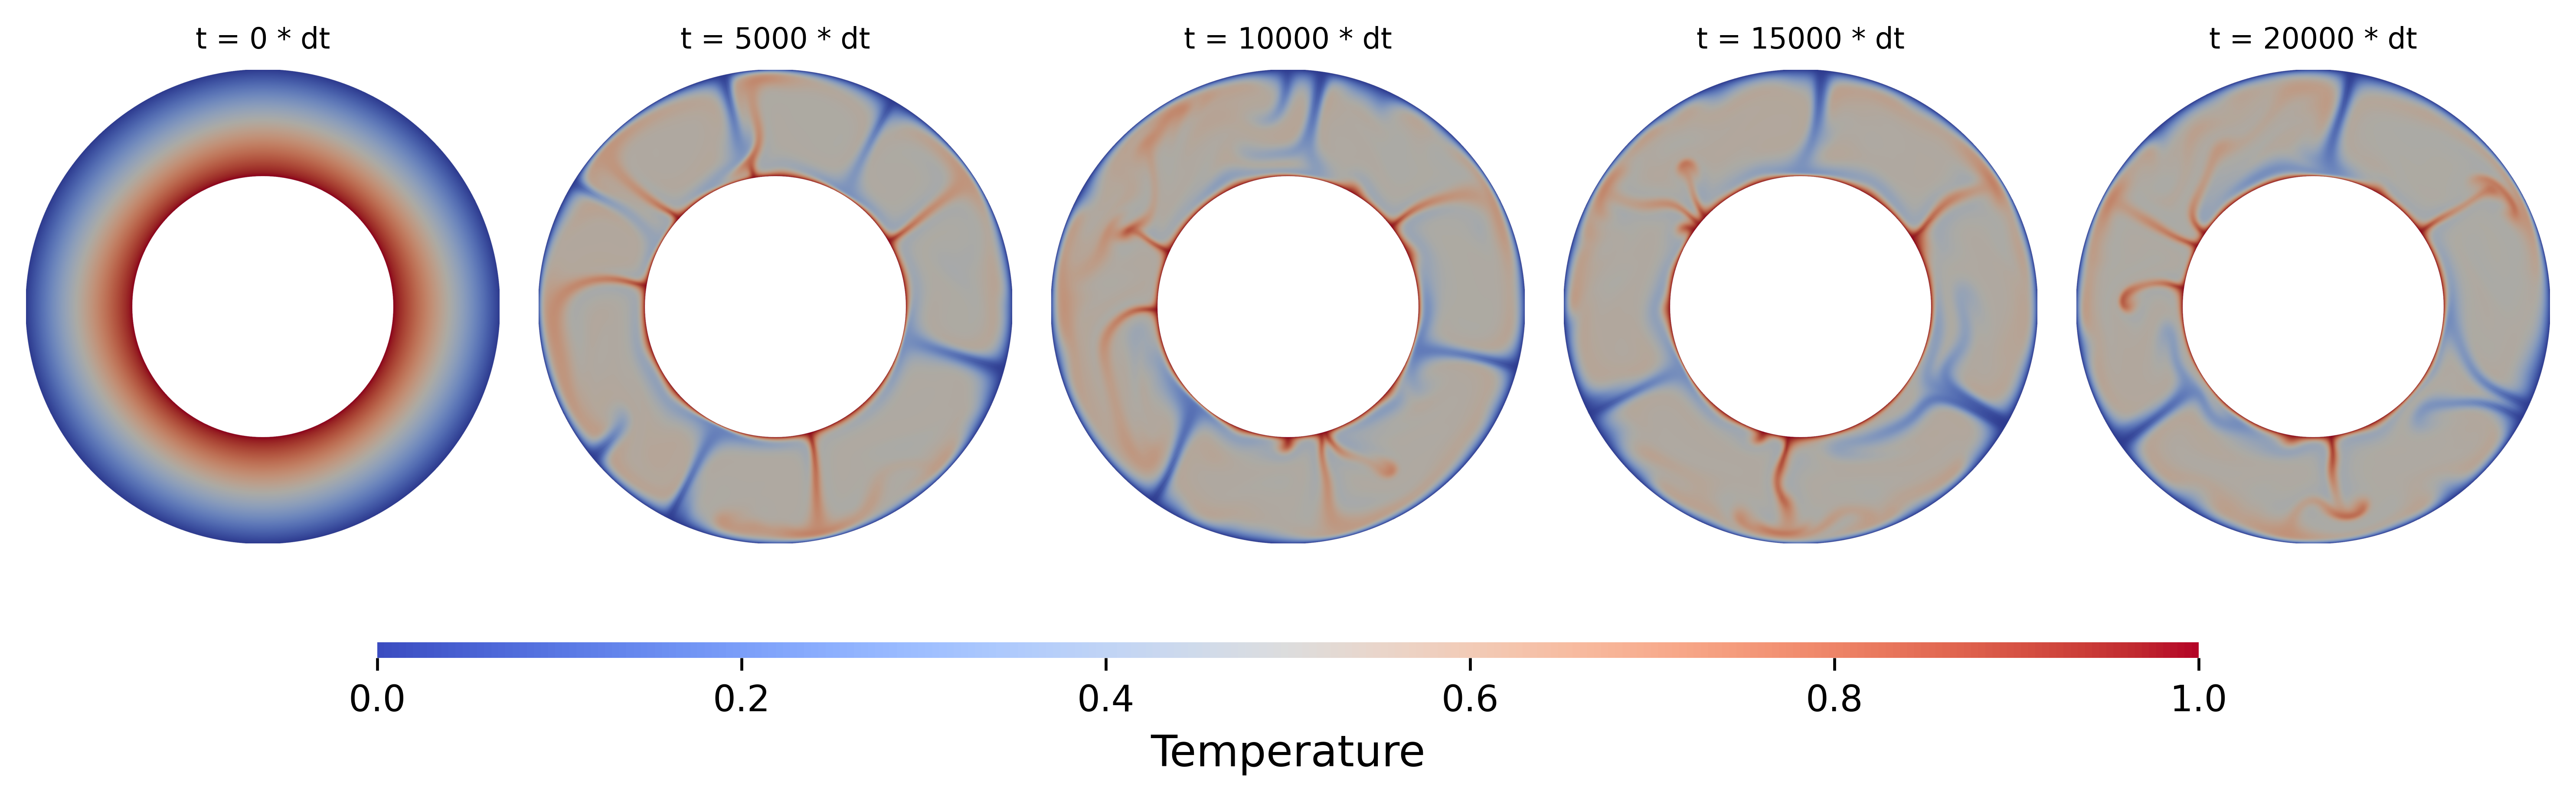

In [37]:
import matplotlib.pyplot as plt
import pyvista as pv
from matplotlib.patches import FancyArrowPatch
import numpy as np
import os

# List of your files (adjust the names as needed)
vtu_files = [
    "output/output_0.vtu",
    "output/output_100.vtu",
    "output/output_200.vtu",
    "output/output_300.vtu",
    "output/output_399.vtu"
]

# Create a 1x5 subplot grid (adjusted size for better fitting)
fig, axes = plt.subplots(1, 5, figsize=(10, 3), dpi=600)  # Reduced figsize to bring them closer
axes = axes.flatten()

# Create a list to store the plotter objects for each file
plotters = []

# Loop through the files and plot the temperature field in each subplot
for i, file in enumerate(vtu_files):
    ax = axes[i]
    # set the title of the subplot and reduce the font size
    ax.set_title(f"t = {i * 5000} * dt", fontsize=8)  # Adjust the title as needed
    ax.axis('off')  # Turn off axis

    # Read the .vtu file and extract temperature data
    vtu_data = pv.read(file)
    temperature = vtu_data.point_data['Temperature']  # Replace 'Temperature' with the correct field name

    # Plot the temperature data
    plotter = pv.Plotter(off_screen=True, window_size=[1920, 1920])  # Offscreen for high-res
    plotter.add_mesh(vtu_data, scalars='Temperature', cmap="coolwarm", show_scalar_bar=False)
    plotter.camera_position = "xy"
    plotter.camera.zoom(1.45)
    
    # Save a screenshot of the plot
    plotter.screenshot(f"temp_{i}.png")

    # Store the plotter to access the color bar later
    plotters.append(plotter)

    # Load the screenshot and display it in the subplot
    img = plt.imread(f"temp_{i}.png")
    ax.imshow(img)
    os.remove(f"temp_{i}.png")  # Remove temporary screenshot

# Create a single color bar for all subplots
# Use the first plotter object to get the color range (since all have the same color scale)
temperature_range = vtu_data.point_data['Temperature'].min(), vtu_data.point_data['Temperature'].max()

# Add color bar to the bottom of the figure
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Position of the color bar (adjustable)
norm = plt.Normalize(vmin=temperature_range[0], vmax=temperature_range[1])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="coolwarm", norm=norm), cax=cbar_ax, orientation="horizontal")
cbar.set_label("Temperature", fontsize=12)
cbar.outline.set_visible(False) # Remove the color bar outline



# Adjust layout
plt.tight_layout()
# Show the final plot
plt.show()


/var/folders/4f/s6d2d9j920v6m6mvz2gbkqkr0000gn/T/ipykernel_29363/936526016.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


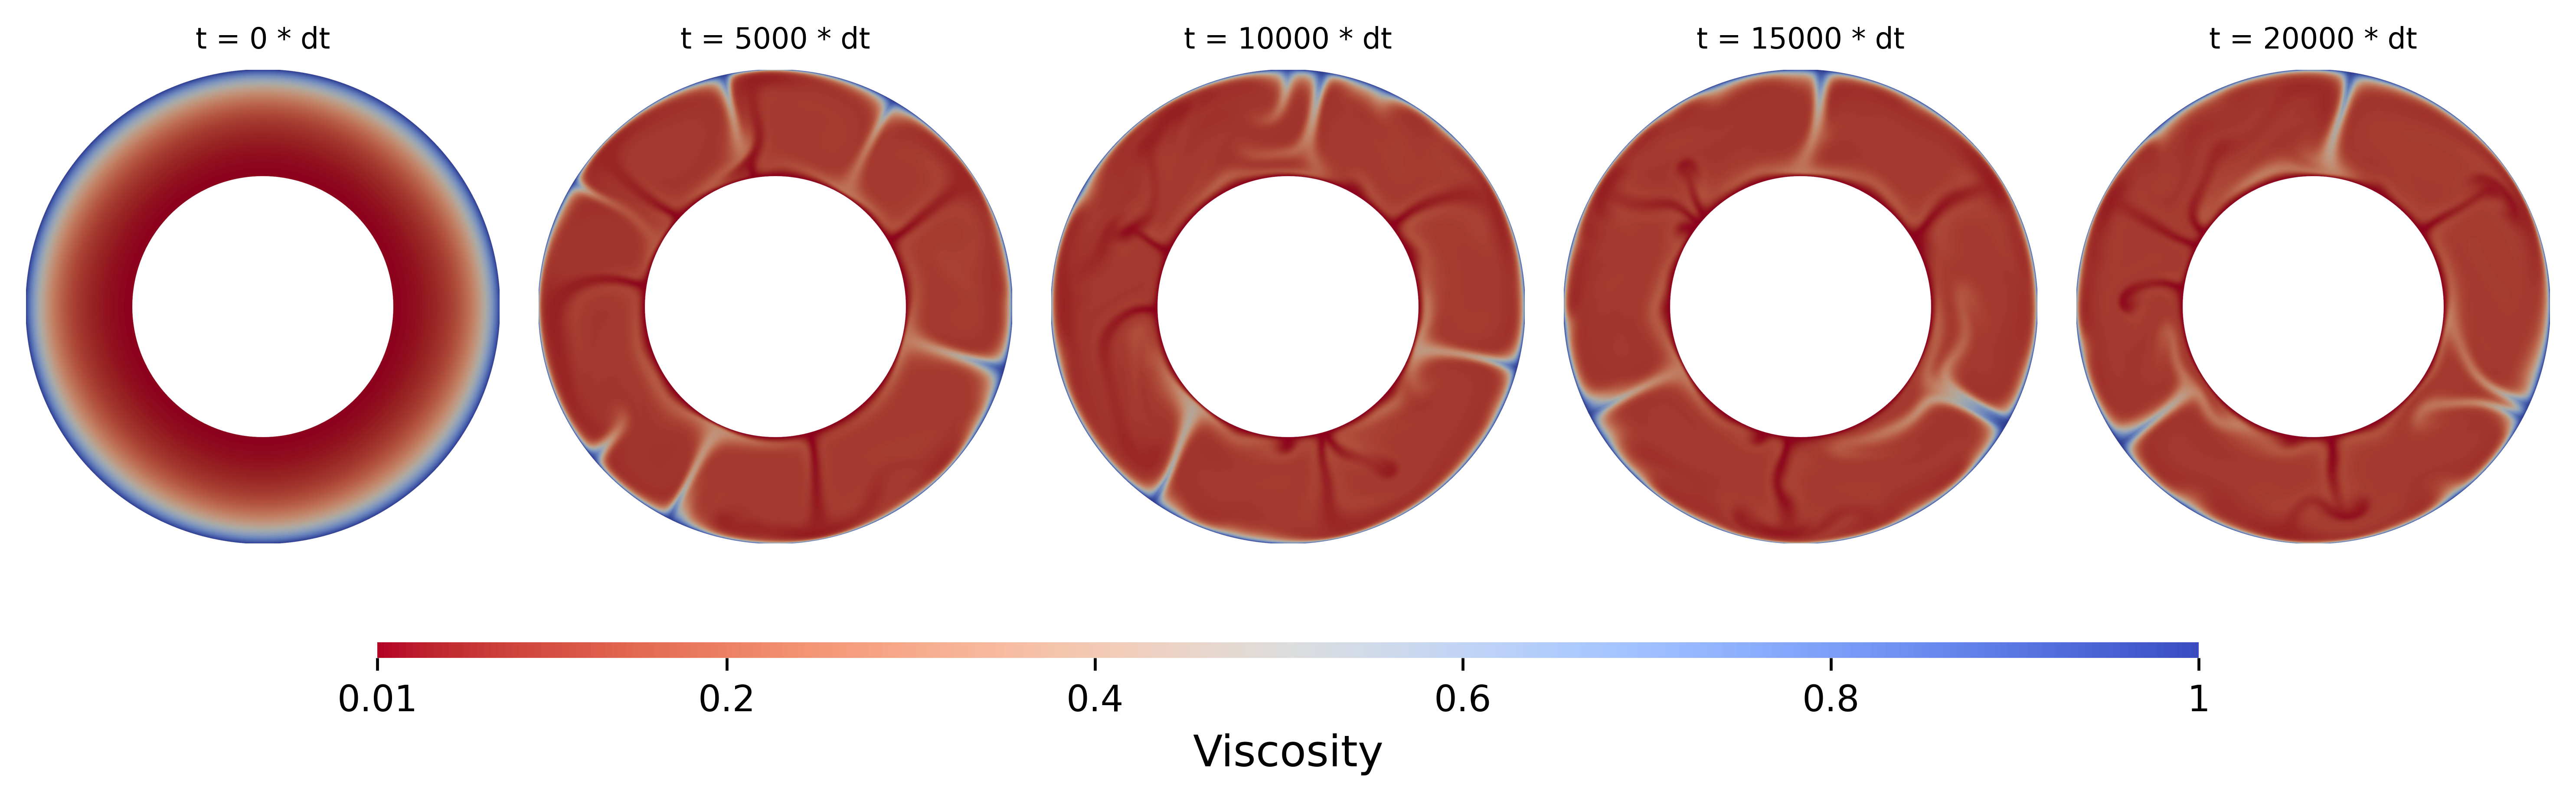

In [42]:
# similarly we will load the viscosity field and plot it
import matplotlib.pyplot as plt
import pyvista as pv
from matplotlib.patches import FancyArrowPatch
import numpy as np
import os

# List of your files (adjust the names as needed)
vtu_files = [
    "output/output_0.vtu",
    "output/output_100.vtu",
    "output/output_200.vtu",
    "output/output_300.vtu",
    "output/output_399.vtu"
]

# Create a 1x5 subplot grid (adjusted size for better fitting)
fig, axes = plt.subplots(1, 5, figsize=(10, 3), dpi=600)  # Reduced figsize to bring them closer
axes = axes.flatten()

# Create a list to store the plotter objects for each file
plotters = []

# Loop through the files and plot the viscosity field in each subplot
for i, file in enumerate(vtu_files):
    ax = axes[i]
    # set the title of the subplot and reduce the font size
    ax.set_title(f"t = {i * 5000} * dt", fontsize=8)  # Adjust the title as needed
    ax.axis('off')  # Turn off axis

    # Read the .vtu file and extract viscosity data
    vtu_data = pv.read(file)
    viscosity = vtu_data.point_data['Viscosity']  # Replace 'Viscosity' with the correct field name

    # Plot the viscosity data
    plotter = pv.Plotter(off_screen=True, window_size=[1920, 1920])  # Offscreen for high-res
    plotter.add_mesh(vtu_data, scalars='Viscosity', cmap="coolwarm_r", show_scalar_bar=False)
    plotter.camera_position = "xy"
    plotter.camera.zoom(1.45)
    
    # Save a screenshot of the plot
    plotter.screenshot(f"visc_{i}.png")

    # Store the plotter to access the color bar later
    plotters.append(plotter)

    # Load the screenshot and display it in the subplot
    img = plt.imread(f"visc_{i}.png")
    ax.imshow(img)
    os.remove(f"visc_{i}.png")  # Remove temporary screenshot

# Create a single color bar for all subplots
# Use the first plotter object to get the color range (since all have the same color scale)
viscosity_range = vtu_data.point_data['Viscosity'].min(), vtu_data.point_data['Viscosity'].max()

# Add color bar to the bottom of the figure
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Position of the color bar (adjustable)
norm = plt.Normalize(vmin=0.01, vmax=1)  # Set the correct range for viscosity
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm),
    cax=cbar_ax,
    orientation="horizontal"
)

# Set custom ticks to include 0.01 explicitly
cbar.set_ticks([0.01, 0.2, 0.4, 0.6, 0.8, 1])
cbar.ax.set_xticklabels(["0.01", "0.2", "0.4", "0.6", "0.8", "1"])

cbar.set_label("Viscosity", fontsize=12)
cbar.outline.set_visible(False)  # Remove the color bar outline


# Adjust layout
plt.tight_layout()
# Show the final plot
plt.show()


